Note: data1 is 80% trainig data and data2 is 20% testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("combine food.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,105.4
1,2013-02-01,106.4
2,2013-03-01,106.5
3,2013-04-01,107.5
4,2013-05-01,109.1
...,...,...
108,2022-01-01,164.9
109,2022-02-01,164.6
110,2022-03-01,166.9
111,2022-04-01,169.4


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,105.4
1,2013-02-01,106.4
2,2013-03-01,106.5
3,2013-04-01,107.5
4,2013-05-01,109.1
...,...,...
108,2022-01-01,164.9
109,2022-02-01,164.6
110,2022-03-01,166.9
111,2022-04-01,169.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,105.4
2013-02-01,106.4
2013-03-01,106.5
2013-04-01,107.5
2013-05-01,109.1
...,...
2022-01-01,164.9
2022-02-01,164.6
2022-03-01,166.9


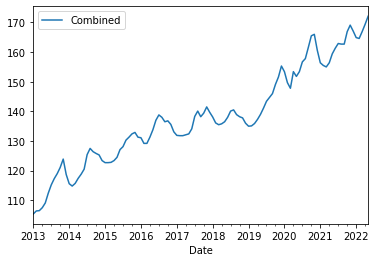

In [10]:
data.plot()

In [11]:
data1 = data.iloc[0:96]
data1

,Combined
Date,
2013-01-01,105.4
2013-02-01,106.4
2013-03-01,106.5
2013-04-01,107.5
2013-05-01,109.1
...,...
2020-08-01,157.8
2020-09-01,161.6
2020-10-01,165.5


## Checking whether the data is stationary or not

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1)
adftest

(0.5104396740115753,
 0.985186971457136,
 9,
 86,
 {'1%': -3.5087828609430614,
  '5%': -2.895783561573195,
  '10%': -2.5850381719848565},
 333.32803841563134)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [13]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.985186971457136


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [14]:
data1["Combined first difference"]=data1-data1.shift(1)
data1

,Combined,Combined first difference
Date,,
2013-01-01,105.4,NaN
2013-02-01,106.4,1.0
2013-03-01,106.5,0.1
2013-04-01,107.5,1.0
2013-05-01,109.1,1.6
...,...,...
2020-08-01,157.8,1.1
2020-09-01,161.6,3.8
2020-10-01,165.5,3.9


In [15]:
adftest = adfuller(data1["Combined first difference"].dropna())
adftest

(-4.04250525219923,
 0.0012035864947255272,
 8,
 86,
 {'1%': -3.5087828609430614,
  '5%': -2.895783561573195,
  '10%': -2.5850381719848565},
 328.58716465108023)

Now data is stationary

In [16]:
data1["Combined 12 difference"] = data1['Combined']-data1['Combined'].shift(12)
data1["Combined 12 difference"]

Date
2013-01-01     NaN
2013-02-01     NaN
2013-03-01     NaN
2013-04-01     NaN
2013-05-01     NaN
              ... 
2020-08-01    13.1
2020-09-01    15.6
2020-10-01    16.4
2020-11-01    14.4
2020-12-01     5.3
Name: Combined 12 difference, Length: 96, dtype: float64

## ACF and PACF Graph

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

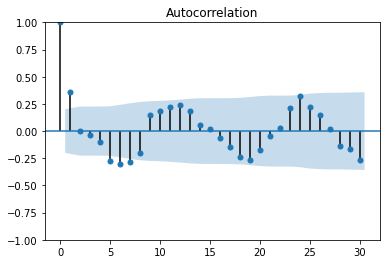

In [18]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data1["Combined first difference"].dropna(),lags=30)

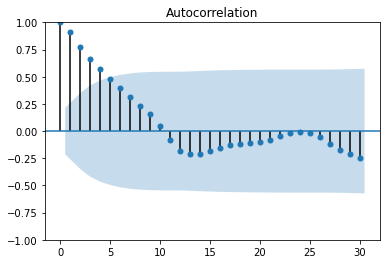

In [19]:
acf12 = plot_acf(data1["Combined 12 difference"].dropna(),lags=30)

from acf12_second graph we get the value of q = 4

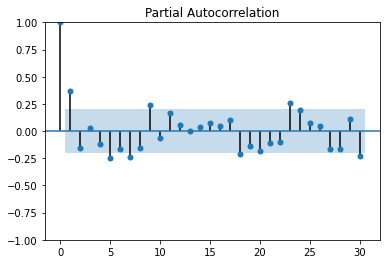

In [20]:
pacf = plot_pacf(data1["Combined first difference"].dropna(),lags=30)

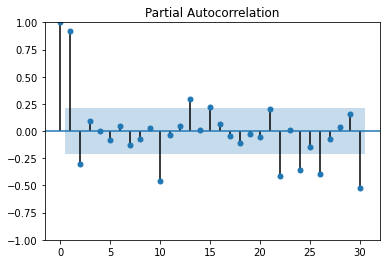

In [21]:
pacf12 = plot_pacf(data1["Combined 12 difference"].dropna(),lags=30)

From PACF we get the value of p = 9

## Sarima model fitting

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model_SARIMA = SARIMAX(data1["Combined"],order=(2,1,1),seasonal_order = (2,0,1,12))

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
model_SARIMA_fit = model_SARIMA.fit()

In [25]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -183.018
Date:                            Thu, 11 Aug 2022   AIC                            380.035
Time:                                    20:36:07   BIC                            397.913
Sample:                                01-01-2013   HQIC                           387.259
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3793      0.783      0.484      0.628      -1.155       1.914
ar.L2         -0.1873      0.230     -0.816      0.415      -0.637       0.263
ma.L1         -0.0469      0.791     -0.059      0.953      -1.598       1.504
ar.S.L12       0.7389      0.222      3.331      0.001       0.304       1.174
ar.S.L24       0.2248      0.174      1.294      0.196      -0.116       0.566
ma.S.L12      -0.7527      0.251     -2.994      0.003      -1.245      -0.260
sigma2         2.4216      0.269      8.993      0.000       1.894       2.949
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                32.23
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             0.33
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [26]:
from datetime import datetime,timedelta
data1['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2020,12,1))
data1['pred_Sarima']

Date
2013-01-01      0.000000
2013-02-01    105.400124
2013-03-01    106.684256
2013-04-01    106.358979
2013-05-01    107.806966
                 ...    
2020-08-01    157.992806
2020-09-01    156.909226
2020-10-01    163.372581
2020-11-01    166.211015
2020-12-01    163.575883
Name: pred_Sarima, Length: 96, dtype: float64

## Residuals

In [27]:
data1['residuals'] = data1["Combined"]-data1['pred_Sarima']
data1['residuals']

Date
2013-01-01    105.400000
2013-02-01      0.999876
2013-03-01     -0.184256
2013-04-01      1.141021
2013-05-01      1.293034
                 ...    
2020-08-01     -0.192806
2020-09-01      4.690774
2020-10-01      2.127419
2020-11-01     -0.211015
2020-12-01     -2.975883
Name: residuals, Length: 96, dtype: float64

In [28]:
data1

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,105.4,NaN,NaN,0.000000,105.400000
2013-02-01,106.4,1.0,NaN,105.400124,0.999876
2013-03-01,106.5,0.1,NaN,106.684256,-0.184256
2013-04-01,107.5,1.0,NaN,106.358979,1.141021
2013-05-01,109.1,1.6,NaN,107.806966,1.293034
...,...,...,...,...,...
2020-08-01,157.8,1.1,13.1,157.992806,-0.192806
2020-09-01,161.6,3.8,15.6,156.909226,4.690774
2020-10-01,165.5,3.9,16.4,163.372581,2.127419


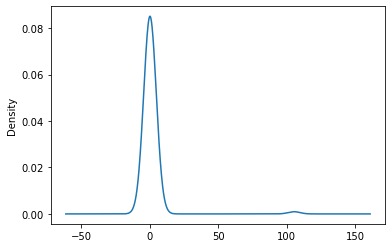

In [29]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [30]:
from scipy import stats
stats.shapiro(data1["residuals"])

ShapiroResult(statistic=0.17289018630981445, pvalue=8.998938273642735e-21)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.974389 > 0.05 

so residuals are normally distributed

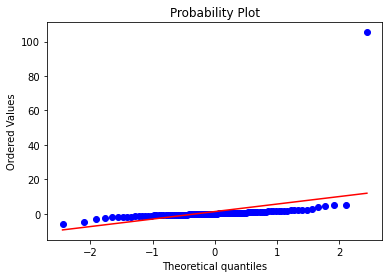

In [31]:
import pylab
from scipy import stats
stats.probplot(data1["residuals"],dist='norm',plot=pylab)
pylab.show()


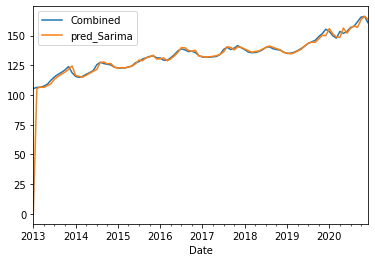

In [32]:
data1[['Combined','pred_Sarima']].plot()

#### Original dataset and our predicted values are nearby same

## Prediction from Jan 2021 to May 2022

In [33]:
data2 = data.iloc[96:113,0:1]
data2

,Combined
Date,
2021-01-01,156.4
2021-02-01,155.5
2021-03-01,155.0
2021-04-01,156.4
2021-05-01,159.4
2021-06-01,161.3
2021-07-01,162.9
2021-08-01,162.7
2021-09-01,162.7


In [34]:
pred_Sarima1 = model_SARIMA_fit.predict(start = datetime(2021,1,1),end = datetime(2022,5,1))
pred_Sarima1

2021-01-01    158.402672
2021-02-01    158.097958
2021-03-01    158.575813
2021-04-01    159.451558
2021-05-01    160.511995
2021-06-01    162.266064
2021-07-01    164.423807
2021-08-01    165.377074
2021-09-01    165.054848
2021-10-01    165.937503
2021-11-01    166.719781
2021-12-01    166.227795
2022-01-01    165.111981
2022-02-01    163.910168
2022-03-01    163.606022
2022-04-01    165.452113
2022-05-01    165.896199
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
data2['pred_Sarima1'] = pred_Sarima1

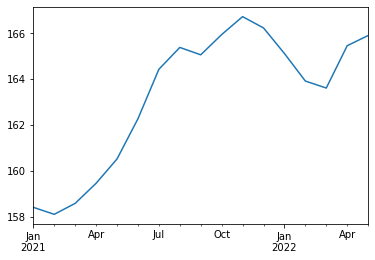

In [36]:
pred_Sarima1.plot()

In [37]:
data['pred_Sarima1'] = pred_Sarima1

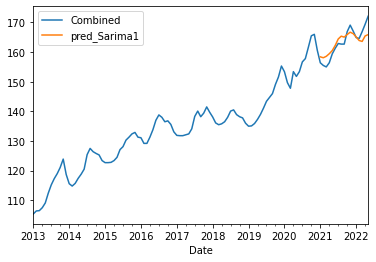

In [38]:
data[['Combined','pred_Sarima1']].plot()

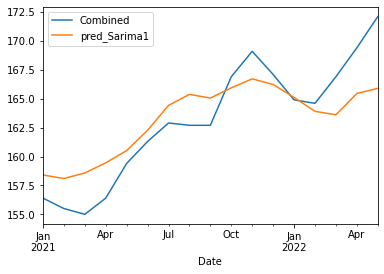

In [39]:
data2[['Combined','pred_Sarima1']].plot()

## Future prediction from June 2022 to May 2023

In [40]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,6,1),end = datetime(2023,5,1))
pred_Sarima2

2022-06-01    167.571010
2022-07-01    169.910776
2022-08-01    170.860223
2022-09-01    171.475049
2022-10-01    173.004011
2022-11-01    173.694694
2022-12-01    172.117102
2023-01-01    170.798553
2023-02-01    169.841986
2023-03-01    169.724684
2023-04-01    171.285691
2023-05-01    171.852268
Freq: MS, Name: predicted_mean, dtype: float64

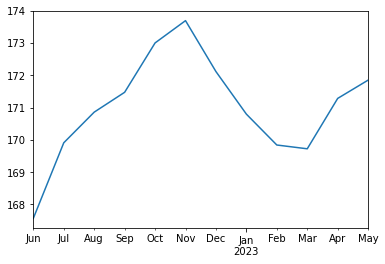

In [41]:
pred_Sarima2.plot()

In [42]:
import numpy as np
  
  
# Mean Squared Error
MSE = np.square(np.subtract(data2["Combined"],data2["pred_Sarima1"])).mean()

In [43]:
MSE

7.226999846910681

In [44]:
DATA = pd.read_csv("All comodities CPI.csv",parse_dates=True)
data

,Combined,pred_Sarima1
Date,,
2013-01-01,105.4,NaN
2013-02-01,106.4,NaN
2013-03-01,106.5,NaN
2013-04-01,107.5,NaN
2013-05-01,109.1,NaN
...,...,...
2022-01-01,164.9,165.111981
2022-02-01,164.6,163.910168
2022-03-01,166.9,163.606022


In [ ]:
X = df["inflation"]
y = df["interest"]
from statsmodels.tsa.stattools import coint
print('Results of Engle-Granger Test:')
egtest = coint(y, X, trend='c', method='aeg', autolag='AIC')
egoutput = pd.Series(egtest[0:3], index=['Test Statistic','p-value','Critical Values 1%,5%,10%'])
print (egoutput)